
* <a href="#p1">Part 1</a>: Write a function to tokenize the yelp reviews
* <a href="#p2">Part 2</a>: Create a vector representation of those tokens
* <a href="#p3">Part 3</a>: Use your tokens in a classification model on Yelp rating
* <a href="#p4">Part 4</a>: Estimate & Interpret a topic model of the Yelp reviews

In [ ]:
#!python -m spacy download en_core_web_sm


In [ ]:
import spacy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from nltk.corpus import brown
from gensim.models import LdaModel
import gensim
import re

In [ ]:
# Visible Testing
assert pd.__package__ == 'pandas'




### Part 0: Import Data

In [ ]:


# Load reviews from URL
data_url = 'https://raw.githubusercontent.com/bloominstituteoftechnology/data-science-practice-datasets/main/unit_4/unit1_nlp/review_sample.json'

# Import data into a DataFrame named df

df = pd.read_json(data_url, lines=True)

df.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,nDuEqIyRc8YKS1q1fX0CZg,1,2015-03-31 16:50:30,0,eZs2tpEJtXPwawvHnHZIgQ,1,"BEWARE!!! FAKE, FAKE, FAKE....We also own a sm...",10,n1LM36qNg4rqGXIcvVXv8w
1,eMYeEapscbKNqUDCx705hg,0,2015-12-16 05:31:03,0,DoQDWJsNbU0KL1O29l_Xug,4,Came here for lunch Togo. Service was quick. S...,0,5CgjjDAic2-FAvCtiHpytA
2,6Q7-wkCPc1KF75jZLOTcMw,1,2010-06-20 19:14:48,1,DDOdGU7zh56yQHmUnL1idQ,3,I've been to Vegas dozens of times and had nev...,2,BdV-cf3LScmb8kZ7iiBcMA
3,k3zrItO4l9hwfLRwHBDc9w,3,2010-07-13 00:33:45,4,LfTMUWnfGFMOfOIyJcwLVA,1,We went here on a night where they closed off ...,5,cZZnBqh4gAEy4CdNvJailQ
4,6hpfRwGlOzbNv7k5eP9rsQ,1,2018-06-30 02:30:01,0,zJSUdI7bJ8PNJAg4lnl_Gg,4,"3.5 to 4 stars\n\nNot bad for the price, $12.9...",5,n9QO4ClYAS7h9fpQwa5bhA


In [ ]:
# Visible Testing
assert isinstance(df, pd.DataFrame), 'df is not a DataFrame. Did you import the data into df?'
assert df.shape[0] == 10000, 'DataFrame df has the wrong number of rows.'

## Part 1: Tokenize Function
<a id="#p1"></a>

Complete the function `tokenize`. Your function should
- Accept one document at a time
- Return a list of tokens

You are free to use any method you have learned this week.

**TO PASS CODEGRADE RUNTIME:**
- Do not run your tokenize function more than one time in your notebook! It is not needed until Part 4!

In [ ]:
# Optional: Consider using spaCy in your function. The spaCy library can be imported by running this cell.
# A pre-trained model (en_core_web_sm) has been made available to you in the CodeGrade container.
# If you DON'T need use the en_core_web_sm model, you can comment it out below.

nlp = spacy.load('en_core_web_sm')

In [ ]:
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
def tokenize(doc):
    tokens = word_tokenize(doc)
    return tokens

In [ ]:
'''Testing'''
assert isinstance(tokenize(df.sample(n=1)["text"].iloc[0]), list), "Make sure your tokenizer function accepts a single document and returns a list of tokens!"

## Part 2: Vector Representation
<a id="#p2"></a>
1. Create a vector representation of the reviews (i.e. create a doc-term matrix).
    * Name that doc-term matrix `dtm`

In [ ]:
%%time
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Use the 'text' column from the DataFrame as reviews
real_reviews = df['text']

# Create a TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english')  # You can customize stop words based on your needs

# Fit and transform the reviews
dtm_sparse = vectorizer.fit_transform(real_reviews)

# Convert the sparse matrix to a Pandas DataFrame
dtm = pd.DataFrame(dtm_sparse.toarray(), columns=vectorizer.get_feature_names_out())

# Display the document-term matrix (dtm)
print(dtm)


       00  000  001695  007  00a     00am  00ish  00pm   01  011802  ...  \
0     0.0  0.0     0.0  0.0  0.0  0.00000    0.0   0.0  0.0     0.0  ...   
1     0.0  0.0     0.0  0.0  0.0  0.00000    0.0   0.0  0.0     0.0  ...   
2     0.0  0.0     0.0  0.0  0.0  0.00000    0.0   0.0  0.0     0.0  ...   
3     0.0  0.0     0.0  0.0  0.0  0.00000    0.0   0.0  0.0     0.0  ...   
4     0.0  0.0     0.0  0.0  0.0  0.00000    0.0   0.0  0.0     0.0  ...   
...   ...  ...     ...  ...  ...      ...    ...   ...  ...     ...  ...   
9995  0.0  0.0     0.0  0.0  0.0  0.19734    0.0   0.0  0.0     0.0  ...   
9996  0.0  0.0     0.0  0.0  0.0  0.00000    0.0   0.0  0.0     0.0  ...   
9997  0.0  0.0     0.0  0.0  0.0  0.00000    0.0   0.0  0.0     0.0  ...   
9998  0.0  0.0     0.0  0.0  0.0  0.00000    0.0   0.0  0.0     0.0  ...   
9999  0.0  0.0     0.0  0.0  0.0  0.00000    0.0   0.0  0.0     0.0  ...   

      誰も乗車しなくても  豆腐花  質問にも丁寧に答えてくれましたし  車好きさんには  這是一個不錯的選擇  運転しない  \
0           0.0  0


2. Write a fake review. Assign the text of the review to an object called `fake_review`.
3. Query the fake review for the 10 most similar reviews, print the text of the reviews.
    - Given the size of the dataset, use `NearestNeighbors` model for this. Name the model `nn`.

In [ ]:
# Create and fit a NearestNeighbors model named "nn"

nn = NearestNeighbors(n_neighbors=10, metric='cosine')  # Adjust the number of neighbors as needed
nn.fit(dtm_sparse)

NearestNeighbors(metric='cosine', n_neighbors=10)

In [ ]:
'''Testing.'''
assert nn.__module__ == 'sklearn.neighbors._unsupervised', ' nn is not a NearestNeighbors instance.'
assert nn.n_neighbors == 10, 'nn has the wrong value for n_neighbors'

In [ ]:
# Create a fake review and find the 10 most similar reviews

# Combine real and fake reviews
fake_review = "This place is amazing! Best service, best prices, and friendly staff."
all_reviews = real_reviews.append(pd.Series(fake_review), ignore_index=True)

# Create a TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english')
dtm_sparse = vectorizer.fit_transform(all_reviews)

# Create and fit a NearestNeighbors model
nn = NearestNeighbors(n_neighbors=10, metric='cosine')
nn.fit(dtm_sparse)

# Vectorize the fake review
fake_review_vectorized = vectorizer.transform([fake_review])

# Query the model for the 10 most similar reviews to the fake review
distances, indices = nn.kneighbors(fake_review_vectorized)

# Display the indices of the 10 most similar reviews
print("Indices of the 10 most similar reviews:", indices.flatten())

# Display the text of the 10 most similar reviews
print("Text of the 10 most similar reviews:")
for i, index in enumerate(indices.flatten()):
    print(f"Similar Review {i + 1}: {all_reviews.iloc[index]}")

<ipython-input-15-955237ed08a7>:5: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_reviews = real_reviews.append(pd.Series(fake_review), ignore_index=True)


Indices of the 10 most similar reviews: [10000  2014   726  2841  1262  6960  4595  2249   838  1066]
Text of the 10 most similar reviews:
Similar Review 1: This place is amazing! Best service, best prices, and friendly staff.
Similar Review 2: Best prices in town!!!! The staff is very helpful and friendly. Best Bariatric program in Las Vegas.
Similar Review 3: Some of the best (if not the best) fried chicken I've ever had. Prices were reasonable given the quantity and the service was excellent. Would recommend and will be back next time I'm in the area.
Similar Review 4: Love this place! Everything on the menu is delicious. Very friendly staff and AMAZING catering! The pastas here are some of the best I've ever had.
Similar Review 5: This place is a mom and pop type of place. I come here in between work shifts. The staff is awesome the service is quick and the food is good. Prices aren't bad either. You definitely get what you pay for. I think the breakfast specials are the best price

In [ ]:
# Visible Testing
assert isinstance(fake_review, str), "Did you write a review in the correct data type?"

## Part 3: Classification
<a id="#p3"></a>
Your goal in this section will be to predict `stars` from the review dataset.

1. Create a pipeline object with a sklearn `CountVectorizer` or `TfidfVector` and any sklearn classifier.
    - Use that pipeline to train a model to predict the `stars` feature (i.e. the labels).
    - Use that pipeline to predict a star rating for your fake review from Part 2.



2. Create a parameter dict including `one parameter for the vectorizer` and `one parameter for the model`.
    - Include 2 possible values for each parameter
        - **Keep the values for each parameter low. Extreme values will compromise runtime**
    - **Use `n_jobs` = 1**
    - Due to limited computational resources on CodeGrader `DO NOT INCLUDE ADDITIONAL PARAMETERS OR VALUES PLEASE.`
    
    
3. Train the entire pipeline with a GridSearch
    - Name your GridSearch object as `gs`

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline

In [ ]:
# Separate features (X) and labels (y)
X = df['text']
y = df['stars']

# Create a pipeline with TfidfVectorizer and LinearSVC
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('classifier', LinearSVC())
])

# Define parameter grid
param_grid = {
    'tfidf__max_features': [100, 500],  # Two possible values for the vectorizer
    'classifier__C': [0.1, 1.0]  # Two possible values for the model
}

# Create GridSearchCV object
gs = GridSearchCV(pipeline, param_grid, n_jobs=1, cv=3)  # Using n_jobs=1 due to limited computational resources

# Train the entire pipeline with GridSearch
gs.fit(X, y)

# Print best parameters
print("Best Parameters:", gs.best_params_)

# Use the trained model to predict a star rating for the fake review
fake_review = "This place is amazing! Best service, best prices, and friendly staff."
fake_rating = gs.predict([fake_review])[0]
print("Predicted Star Rating for Fake Review:", fake_rating)

Best Parameters: {'classifier__C': 0.1, 'tfidf__max_features': 500}
Predicted Star Rating for Fake Review: 5


In [ ]:
# Visible Testing
prediction = gs.predict(["This is your prediction statement."])[0]
assert prediction in df.stars.values, 'You gs object should be able to accept raw text within a list. Did you include a vectorizer in your pipeline?'

## Part 4: Topic Modeling

Let's find out what those yelp reviews are saying! :D

1. Estimate a LDA topic model of the review text
    - Set num_topics to `5`
    - Name your LDA model `lda`
2. Create 1-2 visualizations of the results
    - You can use the most important 3 words of a topic in relevant visualizations.
3. In markdown, write 1-2 paragraphs of analysis on the results of your topic model

When you instantiate your LDA model, it should look like this:

```python
lda = LdaModel(corpus=corpus,
               id2word=id2word,
               random_state=723812,
               num_topics = num_topics,
               passes=1
              )

```

__*Note*__: You can pass the DataFrame column of text reviews to gensim. You do not have to use a generator.

## Note about  pyLDAvis

**pyLDAvis** is the Topic modeling package that we used in class to visualize the topics that LDA generates for us.

You are welcomed to use pyLDAvis if you'd like for your visualization. However, **you MUST comment out the code that imports the package and the cell that generates the visualization before you submit your notebook to CodeGrade.**

Although you should leave the print out of the visualization for graders to see (i.e. comment out the cell after you run it to create the viz).

### 1. Estimate a LDA topic model of the review text

* Use the `tokenize` function you created earlier to create tokens.
* Create an `id2word` object.
> Hint: Use `corpora.Dictionary`
* Create a `corpus` object.
> Hint: Use `id2word.doc2bow`
* Instantiate an `lda` model.

>> Remember to read the LDA docs for more information on the various class attributes and methods available to you in the LDA model: https://radimrehurek.com/gensim/models/ldamodel.html

In [ ]:
# Do not change this value
num_topics = 5

In [ ]:
from gensim import corpora, models

In [ ]:
# Tokenize the text using the earlier created 'tokenize' function
tokenized_text = [tokenize(text) for text in df['text']]

# Create an id2word object using corpora.Dictionary
id2word = corpora.Dictionary(tokenized_text)

# Create a corpus object using id2word.doc2bow
corpus = [id2word.doc2bow(tokens) for tokens in tokenized_text]

# Instantiate an LDA model
lda = models.LdaModel(corpus, id2word=id2word, num_topics=5)  # Adjust num_topics as needed

#### Testing

In [ ]:
# Visible Testing

assert lda.get_topics().shape[0] == 5, 'Did your model complete its training? Did you set num_topics to 5?'

#### 2. Create 2 visualizations of the results:
1. Create a visualization using pyLDAvis. Run the cell, then comment out your code before submission, leaving the visualization in the cell.

2. Create a visualization using the matplotlib library and utilizing the subplots function. Assign this visualization to a variable called `visual_plot`.


In [ ]:
# Cell for pyLDAvis visualization
# YOUR CODE HERE

In [ ]:
import matplotlib.pyplot as plt
#import pyLDAvis.gensim_models as gensimvis
from gensim import models
import numpy as np

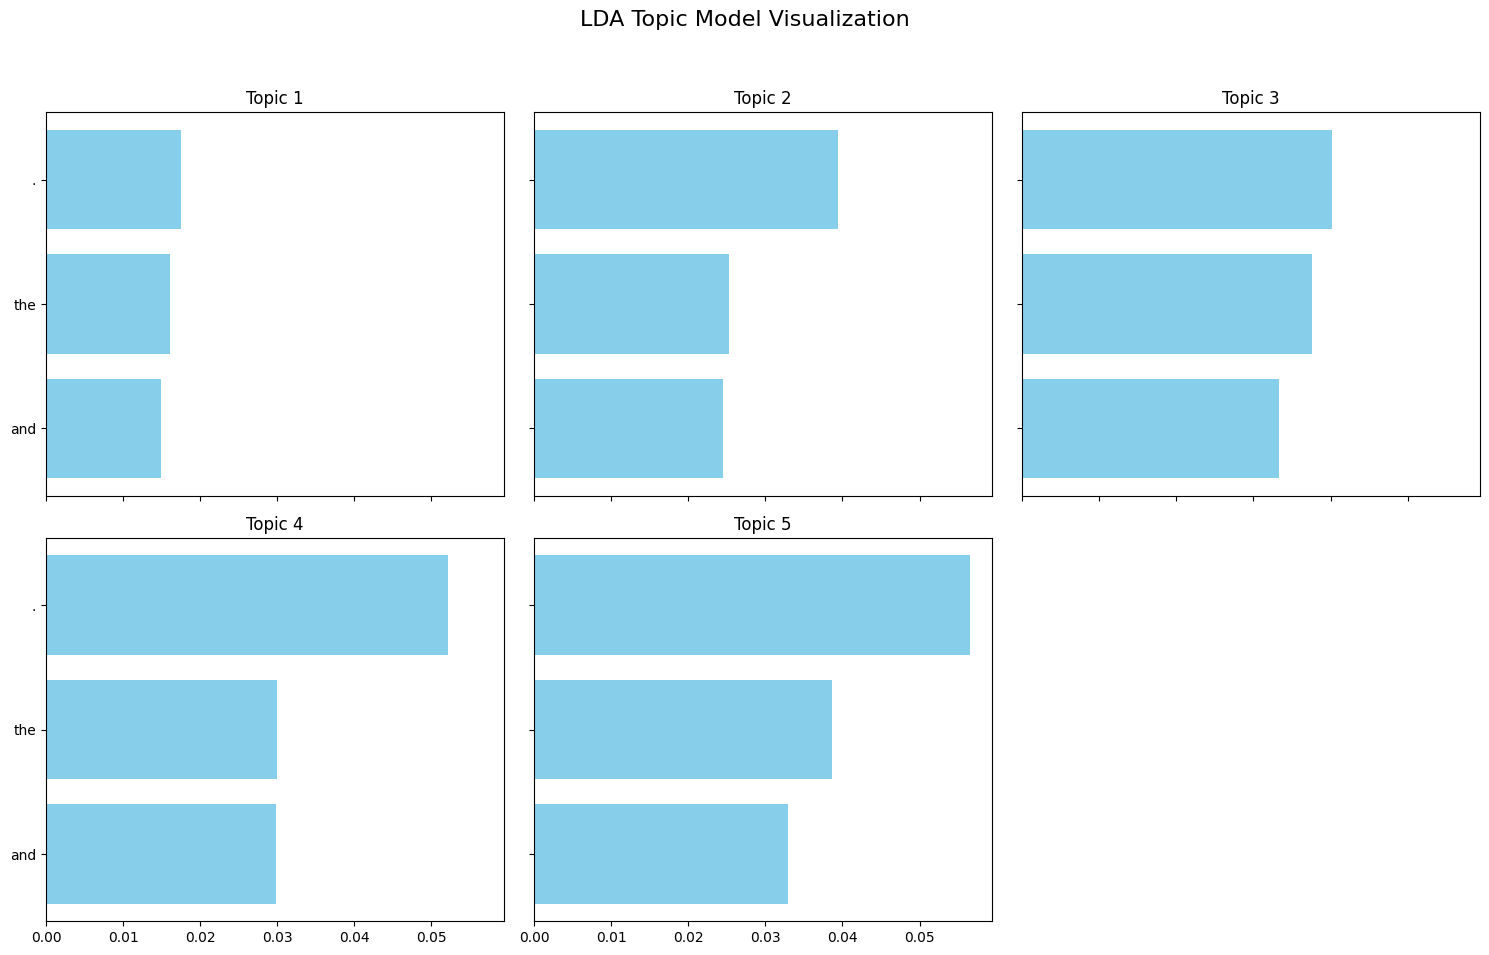

In [ ]:
# Cell for matplotlib visualzation
# Extract topics and word importance
topics = lda.show_topics(formatted=False, num_topics=5, num_words=3)

# Plot the results using matplotlib
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    if i < len(topics):  # Check if the index is within the range of topics
        topic_words = topics[i][1]
        words = [word for word, _ in topic_words]
        importance = [weight for _, weight in topic_words]
        y_pos = np.arange(len(words))

        ax.barh(y_pos, importance, align='center', color='skyblue')
        ax.set_yticks(y_pos)
        ax.set_yticklabels(words)
        ax.invert_yaxis()  # Invert the axis for better readability
        ax.set_title(f'Topic {i+1}')
    else:
        ax.axis('off')  # Turn off empty subplot

plt.suptitle('LDA Topic Model Visualization', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [ ]:
# Visible Testing
assert visual_plot.__module__ == 'matplotlib.axes._subplots', "You must create and assign to visual_plot a visualization"
